# Linear Regression Prediction Model to Analyze the Future of Smart Home Technologies

**The goal of this prediction model is to see the possible future of smart home technologies. The prediction model will help me determine the future of my smart mirror idea, iMar.**

## Retrieve and Analyze Data

First we have to clean the data from a csv file and make it suitable for use in the regression model. This will be done by reading in the csv with pandas.

In [70]:
## imports required
import matplotlib.pyplot as plt # used for plotting regression model
import pandas as pd # used for retrieving data
import numpy as np # used for data computation
from sklearn import linear_model, metrics, model_selection

In [71]:
data = pd.read_csv('VVNT.csv') # read in stock data for the model
data.head() # get first few entries

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-11,9.75,9.75,9.75,9.75,9.75,100
1,2017-12-12,9.75,9.75,9.75,9.75,9.75,0
2,2017-12-13,9.90,9.90,9.70,9.70,9.70,4400
3,2017-12-14,9.70,9.70,9.70,9.70,9.70,0
4,2017-12-15,9.70,9.70,9.70,9.70,9.70,0


## Creating the Linear Regression Model

Now that we have retrieved the data, we can create the linear regression model with sklearn and numPy. We will setup the independent and dependent variables as:

**x := time**
,**y := open price**

In [73]:
def normalize_data(input):
    '''
    Function that normalizes the x variable through mean and norm numPy
    '''
    input = input - np.mean(input, axis=0)
    return (input / np.linalg.norm(input, axis=0))

regression_model = linear_model.LinearRegression() # will normalize data later

x = np.arange(len(data)) # have to ensure the data is evenly spaced
x = normalize_data(np.expand_dims(x, 1)) # used to expand shape, data is also normalized
y = data['Open'] # retrieve open prices

regression_model.fit(x, y) # fit data to regression model

x
y

0       9.75
1       9.75
2       9.90
3       9.70
4       9.70
        ... 
1120    5.76
1121    5.41
1122    5.46
1123    5.64
1124    5.80
Name: Open, Length: 1125, dtype: float64

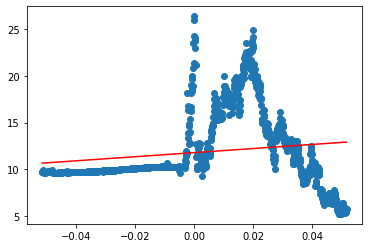

In [74]:
plt.scatter(x, y) # scatter plot with current data 
open_price = regression_model.coef_ * x + regression_model.intercept_

# plot regression model fit
plt.plot(x, open_price, 'red')
plt.show()

## Creating the Prediction Model Based on the Regression Model

Lastly, we can now create a prediction model of the future based on the regression model. This can be done by increasing the space and estimating/extending the future regression model.

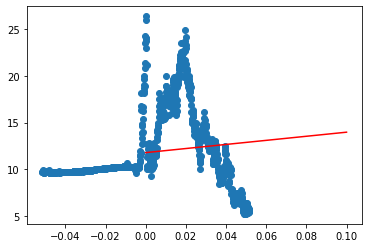

In [79]:
## update with new independent and dependent values (namely x2, y2)
x2 = np.linspace(0, 0.10, 2) # create new range (0 <= x2 <= 0.10)
y2 = regression_model.predict(x2[:, np.newaxis]) # prediction model with updated x (x2) variable

plt.scatter(x, y) # scatter plot with current data again
plt.plot(x2, y2, 'red') # new updated regression line fit
plt.show()